In [3]:
# Imports:
import pandas as pd
import numpy as np
from utils import *
import seaborn as sns

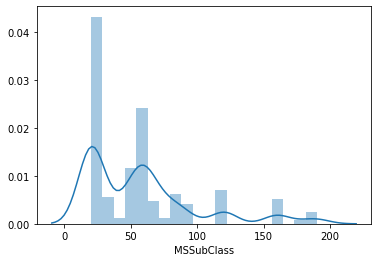

In [11]:
# Check to see if the ditribution for each feature is close to Gaussian
#histogram
sns.distplot(train['MSSubClass']);

#### Note: Check all the unique categorical features in both training and testing datasets to see which features are missing in test dataset, This part might not be necessary but could be helpful.

In [199]:
def feature_params(df, feat, y_feat='SalePrice'):
    
    uniques = stringify_keys(list(df[feat].unique()))
    dic = {}
    
    for val in uniques:
        if val == 'nan':
            vals = df[pd.isna(df[feat])][y_feat]
        else:
            vals = df[df[feat] == val][y_feat]
        
        dic[val] = {'mean': vals.mean(), 'std': vals.std()}
    
    return dic

def seperate_normalize(df, dic, param_dic, y_feat='SalePrice'):
    for feat in dic:
        for val in dic[feat]:
            tmp = dict(df[df[feat] == val][y_feat])
            mean = param_dic[feat][val]['mean']
            std = param_dic[feat][val]['std']
            
            for index in tmp:
                df.loc[feat, index] = ((df[y_feat, index] - mean) / std)

            df.loc[df[feat] == val][feat] = ((tmp - mean) / std ) * cat_dics[feat][val]

    return df

In [193]:
data['train_cat_list'][1:17]

['Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd']

In [194]:
data['train']['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [198]:
dict(data['train'].loc[data['train']['Neighborhood'] == 'MeadowV']['SalePrice'])

{23: 129900,
 75: 91000,
 344: 85000,
 357: 134000,
 434: 81000,
 489: 86000,
 490: 115000,
 614: 75500,
 649: 84500,
 915: 75000,
 1007: 88000,
 1038: 97000,
 1039: 80000,
 1068: 151400,
 1086: 83500,
 1367: 127000,
 1449: 92000}

In [178]:
seperate_normalize(data['train'].copy(), cat_dics, param_dics)

<ipython-input-177-5f15669d7918>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[feat] == val][feat] = ((tmp - mean) / std ) * cat_dics[feat][val]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [134]:
param_dics = {}
for feat in cat_feats:
    param_dics[feat] = feature_params(data['train'], feat)

In [166]:
cat_dics

{'MSZoning': {'RL': 0.25901712591710835,
  'RM': 0.17129511387548102,
  'C (all)': 0.10106556837355433,
  'FV': 0.2902191494380293,
  'RH': 0.17840304239582708},
 'Street': {'Pave': 0.5818127145494533, 'Grvl': 0.41818728545054673},
 'Alley': {'Grvl': 0.2580248197446349,
  'Pave': 0.3546771973411806,
  'nan': 0.3872979829141845},
 'LotShape': {'Reg': 0.1992857956853291,
  'IR1': 0.24929853198533847,
  'IR2': 0.29010006272635613,
  'IR3': 0.26131560960297634},
 'LandContour': {'Lvl': 0.23755809414603113,
  'Bnk': 0.1886714699307004,
  'Low': 0.2685111519639154,
  'HLS': 0.30525928395935326},
 'Utilities': {'AllPub': 0.5682223681374196, 'NoSeWa': 0.43177763186258045},
 'LotConfig': {'Inside': 0.18263146192730112,
  'FR2': 0.18366005455825524,
  'Corner': 0.1874676037605261,
  'CulDSac': 0.23105768678261668,
  'FR3': 0.21518319297130087},
 'LandSlope': {'Gtl': 0.3096989128499461,
  'Mod': 0.33857208479480333,
  'Sev': 0.3517290023552507},
 'Neighborhood': {'CollgCr': 0.04304425976649378,
 

In [167]:
param_dics

{'MSZoning': {'RL': {'mean': 191004.99478714162, 'std': 80766.34131930246},
  'RM': {'mean': 126316.83027522935, 'std': 48521.689832548946},
  'C (all)': {'mean': 74528.0, 'std': 33791.092031283435},
  'FV': {'mean': 214014.06153846154, 'std': 52369.662067447534},
  'RH': {'mean': 131558.375, 'std': 35714.11843491777}},
 'Street': {'Pave': {'mean': 181130.53851444292, 'std': 79446.59731743205},
  'Grvl': {'mean': 130190.5, 'std': 65446.25399134774}},
 'Alley': {'Grvl': {'mean': 122219.08, 'std': 34780.78073365302},
  'Pave': {'mean': 168000.58536585365, 'std': 38370.3752431323},
  'nan': {'mean': 183452.13148283417, 'std': 80667.14517962105}},
 'LotShape': {'Reg': {'mean': 164754.81837837838, 'std': 69673.42721450885},
  'IR1': {'mean': 206101.6652892562, 'std': 85858.4895587145},
  'IR2': {'mean': 239833.36585365853, 'std': 99669.42736209439},
  'IR3': {'mean': 216036.5, 'std': 82540.33485548478}},
 'LandContour': {'Lvl': {'mean': 180183.74675819985, 'std': 78463.56791805025},
  'Bnk'

In [95]:
c = pd.DataFrame(feature_params(data['train'].copy(), 'Neighborhood'))
c

,CollgCr,Veenker,Crawfor,NoRidge,Mitchel,Somerst,NWAmes,OldTown,BrkSide,Sawyer,...,Edwards,Timber,Gilbert,StoneBr,ClearCr,NPkVill,Blmngtn,BrDale,SWISU,Blueste
mean,197965.773333,238772.727273,210624.725490,335295.317073,156270.122449,225379.837209,189050.068493,128225.300885,124834.051724,136793.135135,...,128219.700000,242247.447368,192854.506329,310499.00000,212565.428571,142694.444444,194870.882353,104493.750000,142591.360000,137500.000000
std,51403.666438,72369.317959,68866.395472,121412.658640,36486.625334,56177.555888,37172.218106,52650.583185,40348.689270,22345.129157,...,43208.616459,64845.651549,35986.779085,112969.67664,50231.538993,9377.314529,30393.229219,14330.176493,32622.917679,19091.883092


In [112]:
c['CollgCr']['mean']

197965.77333333335

In [91]:
cat_dics['Neighborhood']

{'CollgCr': 0.04304425976649378,
 'Veenker': 0.05191703153946601,
 'Crawfor': 0.04579673165007603,
 'NoRidge': 0.07290421209470918,
 'Mitchel': 0.03397825609535837,
 'Somerst': 0.049004977454523396,
 'NWAmes': 0.04110569276735894,
 'OldTown': 0.027880390973622476,
 'BrkSide': 0.027143022046897163,
 'Sawyer': 0.029743319483390717,
 'NridgHt': 0.06876761896720276,
 'NAmes': 0.031711944403308295,
 'SawyerW': 0.04056335615506725,
 'IDOTRR': 0.021770198380387268,
 'MeadowV': 0.021433761682225477,
 'Edwards': 0.027879173157315654,
 'Timber': 0.052672549788386036,
 'Gilbert': 0.041932902480024487,
 'StoneBr': 0.06751267852111145,
 'ClearCr': 0.04621870422721212,
 'NPkVill': 0.031026457909772254,
 'Blmngtn': 0.04237132883976904,
 'BrDale': 0.02272037253329444,
 'SWISU': 0.0310040439665444,
 'Blueste': 0.029897015116482902}

In [102]:
# Retrieve Data
data = retrieve_data()
train = data['train'].copy()
test = data['test'].copy()
train_num = data['train_num']
y_feat = 'SalePrice'

# Generates a dictionary of values corresponding to the 
# categorical features within the dataset
cat_dics = {}
cat_feats = train.select_dtypes('object').columns.to_list()

for feat in cat_feats:
    cat_dics[feat] = rank_categorical_values(train, feat)[0]

# There might be some missing values in the categorical features in the
# testing data, which will be treated as numerical and imputed with that
# respect.
## Note: mappings should be done after combining datasets

# Get the length of dataset so I can rebreak them after combining
train_len = train.shape[0]
test_len = test.shape[0]

# Get the column for the dependent data into a seprate variable
dep_col = train[y_feat]

# Drop the dependent column in train
train.drop([y_feat], axis=1 , inplace = True)
feat_cols = train.append(test) # Combine datasets
feat_cols.reset_index(inplace=True) # Reset Indexes
feat_cols.drop(['index', 'Id'], inplace=True, axis=1) # Drop Id and index columns

# In order to impute and decode data, first it is needed 
# to break it into categorical and numerical datasets
feat_cols_cat = feat_cols.select_dtypes('object').columns.to_list()
feat_cols_num = feat_cols.select_dtypes(['float64', 'int64']).columns.to_list()

# Decode the categorical features in the combined dataset
for feat in cat_feats:
    feat_cols[feat] = impute_rank_weight(feat_cols[feat].copy(), cat_dics[feat])

In [22]:
# Exponents
# from FeatureSelection import polynomial_options
# feat_cols = polynomial_options(feat_cols.copy(), list(feat_cols.columns), max_exponent=3)

In [103]:
# Impute the missing categorical variables with KNNImputer
from sklearn.impute import KNNImputer

missings = feat_cols.columns[feat_cols.isna().any()].tolist()

imputer = KNNImputer(n_neighbors=300, weights="distance")
feat_cols[missings] = pd.DataFrame(imputer.fit_transform(feat_cols[missings]))

In [104]:
# Now rebreak the data into train and test
imp_train = feat_cols[:train_len]
imp_train.loc[:, (y_feat)] = dep_col
imp_test = feat_cols[train_len:].reset_index()

/home/dmn/.local/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/dmn/.local/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [174]:
imp_train.corr()[y_feat].nlargest(40)[20:]

MasVnrArea       0.477596
Fireplaces       0.466929
BsmtFinType1     0.459141
HeatingQC        0.442154
MasVnrType       0.434537
Exterior2nd      0.392211
Exterior1st      0.390862
BsmtExposure     0.386653
BsmtFinSF1       0.386420
SaleType         0.370523
SaleCondition    0.368100
LotFrontage      0.349667
MSZoning         0.327963
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HouseStyle       0.293790
GarageQual       0.285344
GarageCond       0.285213
HalfBath         0.284108
Name: SalePrice, dtype: float64

In [212]:
# Feature Engineering
imp_train.corr()[y_feat]

0.18063953044536504

In [242]:
from FeatureSelection import tryOut
features_in = [
    'OverallQual', 'Neighborhood', 'GrLivArea', 'ExterQual', 'TotRmsAbvGrd'
]
fs = [
    'KitchenQual', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 
    'GarageType', 'GarageFinish', 'PoolArea', 'HeatingQC', 
    'Exterior1st', 'Exterior2nd', 'HouseStyle', 'GarageQual',
    'YearBuilt', 'OverallCond', 'CentralAir'
]
c0 = tryOut(fs, 7, imp_train, features_in)
c1 = tryOut(fs, 8, imp_train, features_in)
c2 = tryOut(fs, 9, imp_train, features_in)

In [265]:
c0.to_csv('c0.csv', index=False)
c1.to_csv('c1.csv', index=False)
c2.to_csv('c2.csv', index=False)

In [205]:
c[c['mean'] > 0.8065]

,combination,val1,val2,val3,std,r2,mean
37,"[HouseStyle, HeatingQC, PoolArea, GarageFinish...",0.858123,0.802121,0.759413,0.040420,0.743061,0.806552
50,"[GarageQual, HouseStyle, HeatingQC, GarageFini...",0.858838,0.802202,0.759564,0.040662,0.755273,0.806868


In [254]:
c0[c0['mean'] > 0.81235]

,combination,val1,val2,val3,std,r2,mean
78,"[OverallCond, YearBuilt, GarageFinish, 1stFlrS...",0.863683,0.808152,0.765442,0.040220,0.766941,0.812426
158,"[OverallCond, YearBuilt, HouseStyle, 1stFlrSF,...",0.863244,0.809115,0.764738,0.040281,0.766641,0.812366


In [261]:
c1[c1['mean'] > 0.8125]

,combination,val1,val2,val3,std,r2,mean
197,"[OverallCond, YearBuilt, HouseStyle, GarageFin...",0.863817,0.808997,0.765714,0.040142,0.766334,0.812843
199,"[CentralAir, OverallCond, HouseStyle, GarageFi...",0.863183,0.808421,0.766014,0.039776,0.764071,0.812539


In [264]:
c2[c2['mean'] > 0.8128]

,combination,val1,val2,val3,std,r2,mean
294,"[OverallCond, YearBuilt, HouseStyle, HeatingQC...",0.863762,0.808990,0.765698,0.040126,0.765914,0.812817
331,"[OverallCond, YearBuilt, GarageQual, HouseStyl...",0.863505,0.809190,0.765881,0.039939,0.766771,0.812859
334,"[OverallCond, CentralAir, YearBuilt, HouseStyl...",0.863825,0.809003,0.765781,0.040119,0.765126,0.812870


In [266]:
# Breaking the x and y splits:
# Finding the features
features = c2.iloc[334]['combination']

# Training datasets
X = imp_train[features]
y = imp_train[y_feat]
# It makes more sense to use batchnormalization in NN instead
# of feeding normalized data into the model.
norm_X = normalize(X)
norm_y = normalize(y)

# Testing datasets
X_test = imp_test[features]
norm_X_test = normalize(X_test)

In [267]:
# Chunks of data used to check for overfitting
devs = []
dev_batch_size = int(imp_train.shape[0] * 0.3)

for i in range(10):
    dev_data = imp_train.sample(n=438, random_state=i)
    dev_x = dev_data[features]
    dev_y = dev_data[y_feat]
    devs.append((dev_x, dev_y))

In [268]:
# Check to see if the imputation worked
True in X.isna().any()

False

In [269]:
norm_X.head(5)

,OverallCond,CentralAir,YearBuilt,HouseStyle,GarageFinish,1stFlrSF,TotalBsmtSF,GarageCars,KitchenQual,OverallQual,Neighborhood,GrLivArea,ExterQual,TotRmsAbvGrd
0,-0.517023,0.263722,1.050634,1.248127,0.481325,-0.793162,-0.459145,0.311618,0.581115,0.651256,0.290473,0.370207,0.923900,0.911897
1,2.178881,0.263722,0.156680,-0.211476,0.481325,0.257052,0.466305,0.311618,-0.763002,-0.071812,0.985904,-0.482347,-0.666429,-0.318574
2,-0.517023,0.263722,0.984415,1.248127,0.481325,-0.627611,-0.313261,0.311618,0.581115,0.651256,0.290473,0.514836,0.923900,-0.318574
3,-0.517023,0.263722,-1.862993,1.248127,-0.882294,-0.521555,-0.687089,1.649742,0.581115,0.651256,0.506207,0.383528,-0.666429,0.296662
4,-0.517023,0.263722,0.951306,1.248127,0.481325,-0.045596,0.199611,1.649742,0.581115,1.374324,2.630839,1.298881,0.923900,1.527133


In [135]:
b012 = load_bench_data(file_name='012028.csv', root='./submissions/')[y_feat]
b015 = load_bench_data(file_name='015095.csv', root='./submissions/')[y_feat]

# Fitting parts

In [84]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import matplotlib.pyplot as plt
import seaborn as sns

In [309]:
# Softmax does not make sense, drop out and batchnormalization works
# For metrics, mse and msle should be considered
def build_model05():
  model = keras.Sequential([
    layers.InputLayer(input_shape=[len(X.keys())]),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dense(64),
    layers.Dense(128, activation='tanh'),
    layers.Dense(128),
    layers.Dense(512),
    layers.Dense(512, activation='relu'),
    layers.Dense(8),
    layers.Dense(8),
    layers.Dense(8),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.Adam(0.001)
    
  model.compile(loss='msle', optimizer=optimizer, metrics=['mae'])
  return model

model = build_model05()

def validate():
    # Check to see if there have been an overfit or underfit
    for i in range(10):
        model.evaluate(devs[i][0], devs[i][1], batch_size=batch_size)


In [319]:
EPOCHS = 1100
batch_size = 20

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=110)

In [310]:
for i in range(10):
        model.fit(X, y, batch_size=batch_size, epochs=EPOCHS,
          verbose=0, validation_data=devs[i],
          callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:138.2039,  mae:180920.9688,  val_loss:107.2201,  val_mae:181698.4219,  
....................................................................................................
Epoch: 100, loss:0.1877,  mae:59829.5664,  val_loss:0.1712,  val_mae:57910.6523,  
....................................................................................................
Epoch: 200, loss:0.1510,  mae:53945.5547,  val_loss:0.1404,  val_mae:53318.9531,  
....................................................................................................
Epoch: 300, loss:0.1285,  mae:48806.6016,  val_loss:0.1234,  val_mae:49727.2188,  
....................................................................................................
Epoch: 0, loss:0.0629,  mae:34335.9961,  val_loss:0.0706,  val_mae:36238.1953,  
....................................................................................................
Epoch: 100, loss:0.0433,  mae:29248.1641,  val_loss:0.0478,  val_mae:30570.97

In [ ]:
model.fit(X, y, batch_size=batch_size, epochs=EPOCHS,
          verbose=0, validation_split=0.33,
          callbacks=[tfdocs.modeling.EpochDots()])
validate()


Epoch: 0, loss:0.0345,  mae:26437.4863,  val_loss:0.0476,  val_mae:29446.0781,  
....................................................................................................
Epoch: 100, loss:0.0188,  mae:19546.8379,  val_loss:0.0246,  val_mae:22431.8711,  
....................................................................................................
Epoch: 200, loss:0.0155,  mae:18210.3613,  val_loss:0.0207,  val_mae:19400.9219,  
....................................................................................................
Epoch: 300, loss:0.0119,  mae:15619.0742,  val_loss:0.0259,  val_mae:22189.8340,  
....................................................................................................
Epoch: 400, loss:0.0118,  mae:15095.5732,  val_loss:0.0243,  val_mae:21195.9902,  
....................................................................................................
Epoch: 500, loss:0.0100,  mae:14436.0146,  val_loss:0.0227,  val_mae:19182.3984, 

In [304]:
model.fit(X, y, batch_size=batch_size, epochs=EPOCHS,
          verbose=0, validation_data=devs[0],
          callbacks=[early_stop, tfdocs.modeling.EpochDots()])
validate()


Epoch: 0, loss:0.1593,  mae:55587.3320,  val_loss:0.1544,  val_mae:56528.9922,  
....................................................................................................
Epoch: 100, loss:0.1593,  mae:55574.4102,  val_loss:0.1544,  val_mae:56517.0273,  
....................................................................................................
Epoch: 200, loss:0.1592,  mae:55550.4648,  val_loss:0.1543,  val_mae:56495.6328,  
....................................................................................................
Epoch: 300, loss:0.1591,  mae:55511.2500,  val_loss:0.1541,  val_mae:56457.1445,  
1/1 [==============================] - 0s 998us/step - loss: 0.1651 - mae: 56383.6602


In [316]:
pred_y = pd.DataFrame(model.predict(X_test, batch_size=20, steps=73, verbose=0))[0]
# It would make sense to convert all of the data to int 
# instead of float since there no floats in trainig.
modified = quantize(pred_y)

modified[:5]

[111992, 171767, 188009, 193540, 194560]

In [317]:
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE
print(int(MAE(b012, modified)) / 1000)
# print(int(MAE(b015, modified)) / 1000)
print('b:', int(MAE(b012, b015)) / 1000)

17.644
b: 13.766


In [318]:
print(int(MAE(b012, modified)) / 1000)
# print(int(MAE(b015, modified)) / 1000)
print('b:', int(MAE(b012, b015)) / 1000)

17.644
b: 13.766


In [314]:
output = pd.DataFrame({'Id': test.Id,
                      'SalePrice': modified})
output.to_csv('submissions/submission.csv', index=False)

In [40]:
# Save the model given that the score is good
model.save_weights('./weights/3-015095')